In [9]:
library(ISLR)
df <- College
head(df,5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
library(ggplot2)

In [11]:
str(df) ## summary(df)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

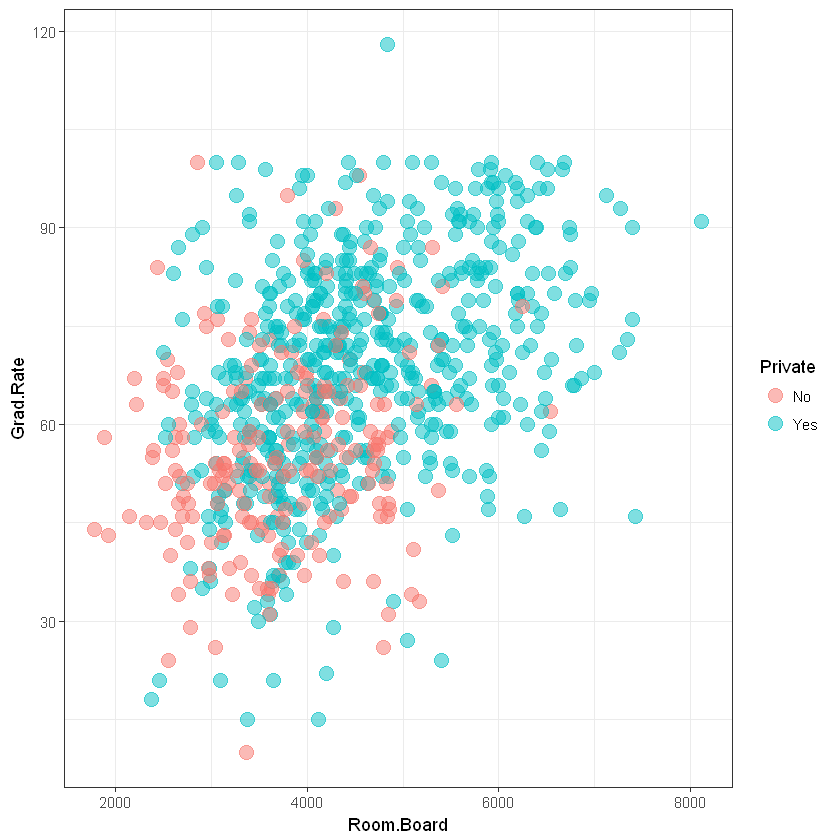

In [17]:
print(ggplot(df, aes(Room.Board,Grad.Rate))+ geom_point(aes(color = Private), size = 4, alpha = 0.5) + theme_bw())

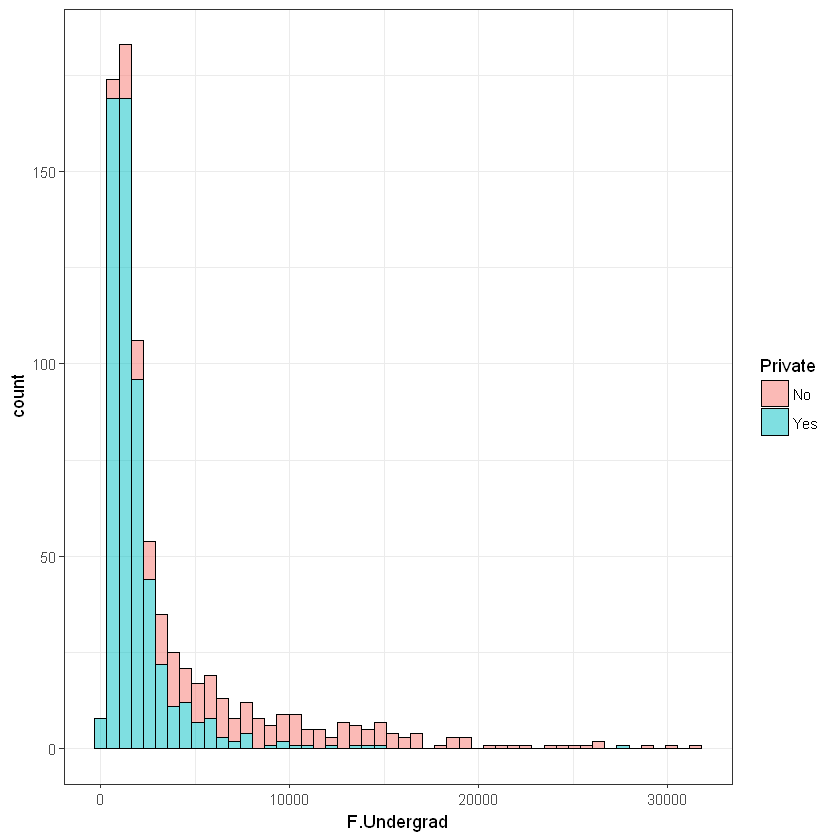

In [16]:
ggplot(df, aes(F.Undergrad)) + geom_histogram(aes(fill=Private),color = 'black', bins =50, alpha = 0.5) + theme_bw()

In [23]:
library(caTools)
set.seed(101)
sample <- sample.split(df$Private, SplitRatio = 0.70)
train <- subset(df, sample == T)
test <- subset(df,sample == F)

###################################
#### build decision tree

library(rpart)
tree <- rpart(Private ~., method = 'class', data = train)
summary(tree)




Call:
rpart(formula = Private ~ ., data = train, method = "class")
  n= 544 

          CP nsplit rel error    xerror       xstd
1 0.48648649      0 1.0000000 1.0000000 0.07013217
2 0.21621622      1 0.5135135 0.6081081 0.05855824
3 0.02702703      2 0.2972973 0.3918919 0.04863747
4 0.02027027      3 0.2702703 0.4054054 0.04936705
5 0.01000000      8 0.1554054 0.4121622 0.04972529

Variable importance
F.Undergrad      Enroll      Accept        Apps    Outstate P.Undergrad 
         17          15          13          11          10           8 
  S.F.Ratio  Room.Board      Expend   Grad.Rate   Top10perc   Top25perc 
          7           5           4           4           3           1 

Node number 1: 544 observations,    complexity param=0.4864865
  predicted class=Yes  expected loss=0.2720588  P(node) =1
    class counts:   148   396
   probabilities: 0.272 0.728 
  left son=2 (164 obs) right son=3 (380 obs)
  Primary splits:
      F.Undergrad < 2992.5  to the right, improve=94.012

In [25]:
tree.preds <- predict(tree, test)
head(tree.preds)

,No,Yes
Adrian College,0.003311258,0.9966887
Alfred University,0.003311258,0.9966887
Allegheny College,0.003311258,0.9966887
Allentown Coll. of St. Francis de Sales,0.003311258,0.9966887
Alma College,0.003311258,0.9966887
Amherst College,0.003311258,0.9966887


In [28]:
tree.preds <- as.data.frame(tree.preds)
# 
joiner <- function(x) {
    if( x > 0.5) {
        return('Yes')
    }
    else {
        return('No')
    }
}

tree.preds$Private <- sapply(tree.preds$Yes, joiner)

In [31]:
print(head(tree.preds))

                                                 No       Yes Private
Adrian College                          0.003311258 0.9966887     Yes
Alfred University                       0.003311258 0.9966887     Yes
Allegheny College                       0.003311258 0.9966887     Yes
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887     Yes
Alma College                            0.003311258 0.9966887     Yes
Amherst College                         0.003311258 0.9966887     Yes


In [32]:
## confusion matrix
table(tree.preds$Private, test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

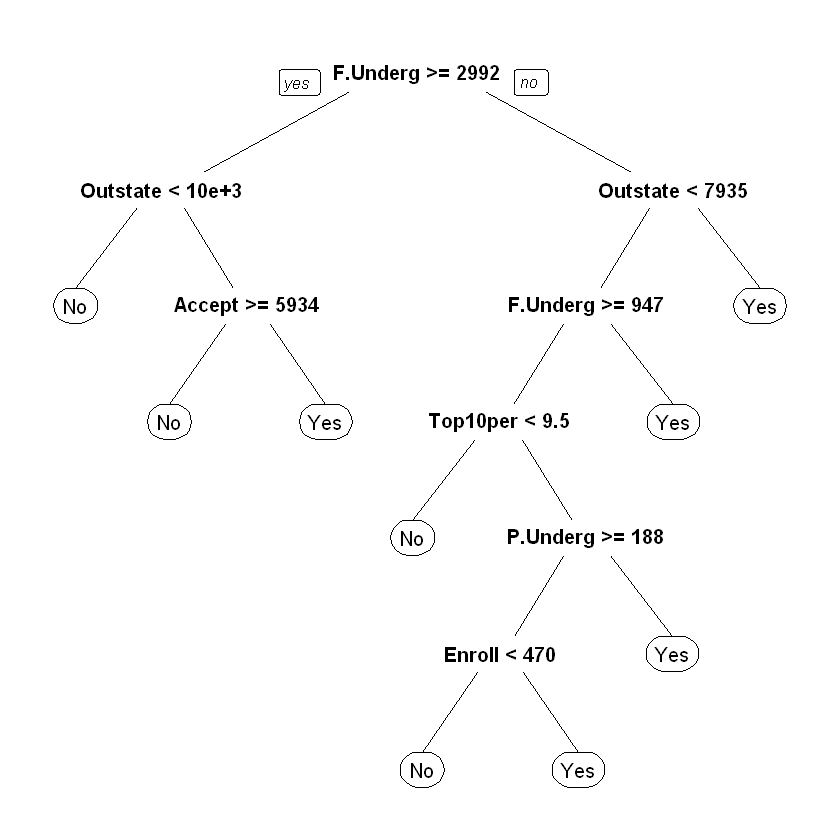

In [33]:
library(rpart.plot)
prp(tree)

In [ ]:
## Now we will use the Random Forest to solutionize


In [34]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [38]:
rf.model <- randomForest(Private ~.,data = train, importance = TRUE)
#summary(rf.model)

rf.model$confusion
##rf.model$importance - Read ISLR

,No,Yes,class.error
No,126,22,0.14864865
Yes,10,386,0.02525253


,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
Apps,0.026229692,0.0146619210,0.0177925666,9.622372
Accept,0.031730960,0.0165585650,0.0205351405,13.000913
Enroll,0.036916966,0.0241289210,0.0275779245,20.427165
Top10perc,0.010928616,0.0049840346,0.0065941094,5.660348
Top25perc,0.006264211,0.0039261244,0.0045109800,4.430650
F.Undergrad,0.142592507,0.0671035252,0.0875542977,40.386851
P.Undergrad,0.044264139,0.0049254388,0.0157194047,14.871801
Outstate,0.142678589,0.0638838812,0.0851120352,41.436051
Room.Board,0.017981860,0.0138960683,0.0149965573,11.477161
Books,0.002502703,-0.0006222257,0.0002339071,2.276262


In [39]:
rf.preds <- predict(rf.model , test)
table(rf.preds,test$Private)

        
rf.preds  No Yes
     No   56   6
     Yes   8 163